## SOK-1006 Arbeidskrav (2)


In [1]:
# Laster inn pakker.
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

<hr/>

### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved

\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:

\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}

In [2]:
# Koden under er hentet fra oppgaveteksten.
# Etterspørsel i likning (1).
def demand(p):
    return 500 - 3.2*p

# Tilbud i likning (3).
def supply(p,t):
    return -100+4.3*p*(1-t)

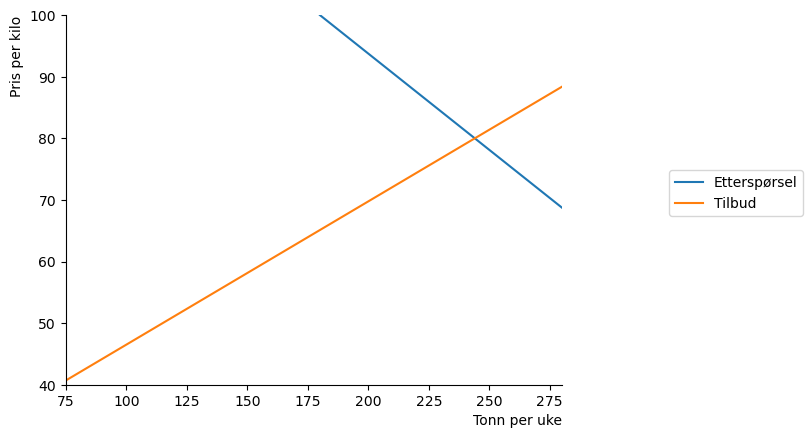

In [3]:
# Koden under er hentet fra oppgaveteksten.
# Definerer ett intervall mellom 0.1 og 100, med 100 punkter.
p_num=np.linspace(0.1,100,100)

# Lager en basisfigur.
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke',  loc='right')
                ax.set(xlim = (75, 280))
                ax.set(ylim = (40, 100))
                ax.spines  ['top'].set_color('none')
                ax.spines['right'].set_color('none')
                return fig, ax
            
fig, ax = create_ax()

# plott funksjonene
ax.plot(demand(p_num),    p_num, label = 'Etterspørsel')
ax.plot(supply(p_num, 0), p_num, label = 'Tilbud')
ax.legend(bbox_to_anchor = (1.5,0.6));

<hr/>

### Oppgave 1

Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).

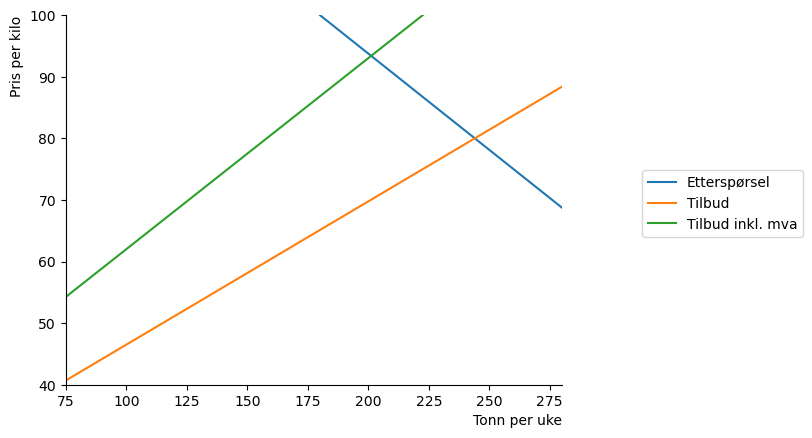

In [4]:
# Henter basisfiguren.
fig, ax = create_ax()

# Plotter samme funskjoner som i forrige figur.
ax.plot(demand(p_num),    p_num, label = 'Etterspørsel')
ax.plot(supply(p_num, 0), p_num, label = 'Tilbud')

# Plotter supply med 25% mva. 
ax.plot(supply(p_num, 0.25), p_num, label = 'Tilbud inkl. mva')

# Gir figuren en legend.
ax.legend(bbox_to_anchor = (1.5,0.6));

Tilbud inkl. mva. kurven er brattere fordi den tar utgangspunkt i tilbudskurven og legger på merverdiavgift(25%).

<hr/>

### Oppgave 2

Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.

In [5]:
# Definerer symboler jeg skal bruke til utregningene.
p = sp.symbols("p")

In [6]:
# Lager likninger for supply likevekt.
supply_eq     = sp.Eq(500-3.2*p, -100+4.3*p)
supply_mva_eq = sp.Eq(500-3.2*p, -100+4.3*p*0.75)

In [7]:
# Løser likningene med hensyn på p.
supply_sol     = sp.solve(supply_eq, p)
supply_mva_sol = sp.solve(supply_mva_eq, p)

# Finner likevekstprisen ekskl. og inkl. mva.
print("\033[1m" + "Likevektspris:" + "\033[0m")
print("Likevektsprisen ekskl. mva er " + str(supply_sol[0]) +     " kr pr. kg")
print("Likevektsprisen inkl. mva er "  + str(supply_mva_sol[0]) + " kr pr. kg.")
print()

# Finner likevekstkvantum ekskl. og inkl. mva.
print("\033[1m" + "Likevektskvantum:" + "\033[0m")
print("Likevektskvantum ekskl. mva er " + str(supply(supply_sol[0], 0)) +        " tonn pr. uke.")
print("Likevektskvantum inkl. mva er "  + str(supply(supply_mva_sol[0], 0.25)) + " tonn pr. uke.")

Likevektspris:
Likevektsprisen ekskl. mva er 80.0000000000000 kr pr. kg
Likevektsprisen inkl. mva er 93.3852140077821 kr pr. kg.

Likevektskvantum:
Likevektskvantum ekskl. mva er 244.000000000000 tonn pr. uke.
Likevektskvantum inkl. mva er 201.167315175097 tonn pr. uke.


In [8]:
# Lager intervaller til å plotte i figuren.
x_1 = np.linspace(0,                244,              10)
x_2 = np.linspace(0,                201.167315175097, 10)
y_1 = np.linspace(80,               80,               10)
y_2 = np.linspace(93.3852140077821, 93.3852140077821, 10)

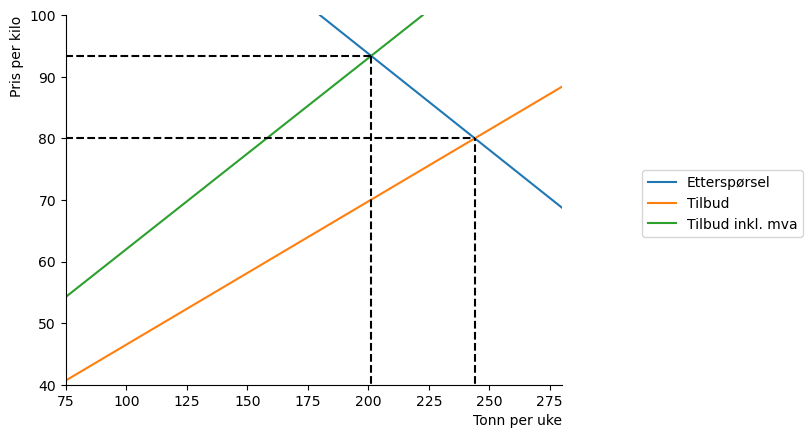

In [9]:
# Plotter likevekten ekskl. mva.
ax.plot(x_1, y_1,     linestyle = "--", color = "black")
ax.vlines(244, 0, 80, linestyle = "--", color = "black")

# Plotter likevekten inkl. mva.
ax.plot(x_2, y_2,                                linestyle = "--", color = "black")
ax.vlines(201.167315175097, 0, 93.3852140077821, linestyle = "--", color = "black")

# Viser figuren.
fig

<hr/>

### Oppgave 3

Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.

In [10]:
# Lager en likning for likevekten mellom tilbud ekskl. mva og likevekten inkl. mva.
supply_new = sp.Eq(supply(supply_mva_sol[0], 0.25), -100 + 4.3*p)

# Løser likningen.
tilbud_sol = sp.solve(supply_new, p)

# Viser svaret.
tilbud_sol

[70.0389105058366]

In [11]:
# Lager intervaller til å plotte i figuren.
y_3 = np.linspace(70.0389105058366, 70.0389105058366, 10)

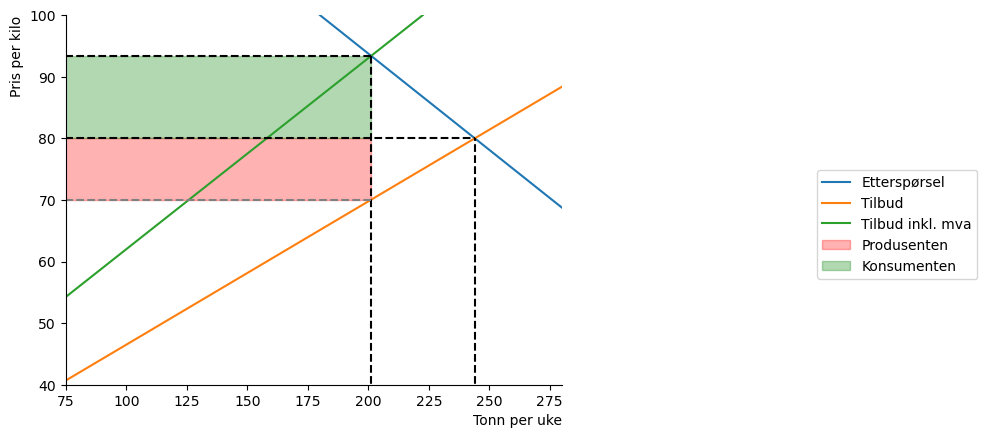

In [12]:
# Plotter inn den nye likevekten.
ax.plot(x_2, y_3, linestyle = "--", color = "gray")

# Fyller inn områdene til produsenten og konsumenten.
ax.fill_between(x_2,y_1,y_3, color = "red",   alpha = 0.3, label = "Produsenten")
ax.fill_between(x_2,y_2,y_1, color = "green", alpha = 0.3, label = "Konsumenten")

# Oppdaterer legend.
ax.legend(bbox_to_anchor = (1.5,0.6));

# Viser figuren.
fig

In [13]:
# Viser resultater
print("\033[1m" + "Staten:" + "\033[0m")
print("Staten tjener " + str(supply_mva_sol[0]-tilbud_sol[0]) + " kr pr. kg. solgt.")
print("\033[1m" + "Produsent:" + "\033[0m")
print("Produsenten betaler " + str(supply_sol[0]-tilbud_sol[0]) + " kr pr. kg. solgt.")
print("\033[1m" + "Konsument:" + "\033[0m")
print("Konsumenten betaler " + str(supply_mva_sol[0]-supply_sol[0]) + " kr pr. kg. solgt.")

Staten:
Staten tjener 23.3463035019455 kr pr. kg. solgt.
Produsent:
Produsenten betaler 9.96108949416345 kr pr. kg. solgt.
Konsument:
Konsumenten betaler 13.3852140077821 kr pr. kg. solgt.


<hr/>

### Oppgave 4

Hva er fordeler/ulemper av en mva og en stykkprisavgift?

**Fordeler med MVA:**
En av fordelene med MVA er at bedrifter kan trekke fra MVA når de kjøper inn varer og tjenester som går til produksjon av nye goder eller tjenester. Når bedriftene da selger disse godene eller tjenestene videre til forbrukere, må bedriften betale inn MVA på sine varer og tjenester til staten.
En annen fordel med MVA er at alle betaler inn til staten (felleskapet) hver gang de handler varer og tjenester, dette kan føre til f.eks. lavere skatt.

**Ulemper med MVA:**
En av ulempene med MVA som vi så på i forrige eksempel er at varer og tjenester blir dyrere for forbrukeren, siden bedriften må finne en salgspris for så å legge på MVA på sine varer og tjenester. 

**Stykkpris:**
Stykkpris er en måte for staten og samle inn penger på f.eks. skadelig konsum. Problemet med stykkpris er at det svært ofte er vanskelig å bergene siden det tar utgangspunkt i en fast komponent.

<hr/>